In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

sns.set_theme()
sns.set_palette(palette="Blues_r")

## Showing the first 5 rows of the dataframe as a peak into the data

In [2]:
df = pd.read_csv('Datsets/IBM Product Recommendation Data.csv')
country = pd.read_csv('Datsets/Country Coordinates.csv')
world_cities = pd.read_csv("Datsets/worldcities.csv")
state_abb = pd.read_csv("Datsets/US State Abbreviations.csv")
df.head()

,CUSTNAME,GenderCode,ADDRESS1,CITY,STATE,COUNTRY_CODE,POSTAL_CODE,POSTAL_CODE_PLUS4,ADDRESS2,EMAIL_ADDRESS,...,Cleaning Products,Condiments,Frozen Foods,Kitchen Items,Meat,Office Supplies,Personal Care,Pet Supplies,Sea Food,Spices
0,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,NaN,Allen.M.Perl@spambob.com,...,0,1,0,0,0,0,0,0,0,0
1,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,NaN,Allen.M.Perl@spambob.com,...,1,0,0,0,0,0,0,0,0,0
2,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,NaN,Allen.M.Perl@spambob.com,...,0,0,0,0,0,0,0,0,0,0
3,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,NaN,Allen.M.Perl@spambob.com,...,0,0,0,0,0,0,0,0,0,0
4,Allen Perl,Mr.,4707 Hillcrest Lane,Abeto,PG,IT,6040,0,NaN,Allen.M.Perl@spambob.com,...,0,0,0,0,0,0,0,0,0,0


# Steps for data analysis checklist

## 1. Most number of Products ordered - Completed
## 2. Explore location and see where we get the highest number of orders - Completed
## 3. Explore date and time and find in-depth analysis of what products are bought during which frequency of time - Completed
## 4. Which genders tend to order what type of products - Completed
## 5. How long does it take for an order to arrive. Do the following factors have anything to do with it: Location, time of year, product type - Incomplete

## Summary of the data
### What are the dimensions of the dataframe 
### What are it's features
### Any missing values?
### Number ofnique values

In [3]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :\n',df.nunique())
print('\nMissing values in columns:\n',df.isnull().sum())
print('\nDuplicated rows: \n',df.duplicated().value_counts())

Rows     : 13733
Columns  : 62

Features :
     : ['CUSTNAME', 'GenderCode', 'ADDRESS1', 'CITY', 'STATE', 'COUNTRY_CODE', 'POSTAL_CODE', 'POSTAL_CODE_PLUS4', 'ADDRESS2', 'EMAIL_ADDRESS', 'PHONE_NUMBER', 'CREDITCARD_TYPE', 'LOCALITY', 'SALESMAN_ID', 'NATIONALITY', 'NATIONAL_ID', 'CREDITCARD_NUMBER', 'DRIVER_LICENSE', 'CUST_ID', 'ORDER_ID', 'ORDER_DATE', 'ORDER_TIME', 'FREIGHT_CHARGES', 'ORDER_SALESMAN', 'ORDER_POSTED_DATE', 'ORDER_SHIP_DATE', 'AGE', 'ORDER_VALUE', 'T_TYPE', 'PURCHASE_TOUCHPOINT', 'PURCHASE_STATUS', 'ORDER_TYPE', 'GENERATION', 'Baby Food', 'Diapers', 'Formula', 'Lotion', 'Baby wash', 'Wipes', 'Fresh Fruits', 'Fresh Vegetables', 'Beer', 'Wine', 'Club Soda', 'Sports Drink', 'Chips', 'Popcorn', 'Oatmeal', 'Medicines', 'Canned Foods', 'Cigarettes', 'Cheese', 'Cleaning Products', 'Condiments', 'Frozen Foods', 'Kitchen Items', 'Meat', 'Office Supplies', 'Personal Care', 'Pet Supplies', 'Sea Food', 'Spices']

Missing values    : 43702

Unique values :
 CUSTNAME           4698
G

In [4]:
#Dropping unecessary columns
df1 = df.copy()
df1.drop(['CUSTNAME','ADDRESS1','POSTAL_CODE','POSTAL_CODE_PLUS4','ADDRESS2','EMAIL_ADDRESS','PHONE_NUMBER','CREDITCARD_TYPE','LOCALITY','SALESMAN_ID','NATIONALITY','NATIONAL_ID','CREDITCARD_NUMBER','DRIVER_LICENSE','CUST_ID','ORDER_SALESMAN'], axis = 1, inplace = True)

In [5]:
#Changing value in GenderCode column to M or F to represent both genders

for i,val in enumerate(df1['GenderCode']):

    if val == 'Mrs.' or val == 'Miss.':
        df1['GenderCode'][i] = 'F';

    elif val == 'Mr.' or val == 'Master.':
        df1['GenderCode'][i] = 'M';

<ipython-input-5-7baa07d75a02>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GenderCode'][i] = 'M';
<ipython-input-5-7baa07d75a02>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['GenderCode'][i] = 'F';


In [6]:
#Transforming data so that products are all in one column
df1 = pd.melt(df1,id_vars=df1.columns[0:17], var_name='Product',ignore_index=True)

#Removing values with zeros which indicate that a product was not bought
df1 = df1[df1['value'] != 0]

#Dropping value column as it doesn't give us any further info
df1.drop('value', axis = 1, inplace = True)

#Resetting index
df1.reset_index(drop=True)

,GenderCode,CITY,STATE,COUNTRY_CODE,ORDER_ID,ORDER_DATE,ORDER_TIME,FREIGHT_CHARGES,ORDER_POSTED_DATE,ORDER_SHIP_DATE,AGE,ORDER_VALUE,T_TYPE,PURCHASE_TOUCHPOINT,PURCHASE_STATUS,ORDER_TYPE,GENERATION,Product
0,F,Alcalali,NaN,ES,4950,25-09-16 0:00,25-09-16 16:43,18.45,20-10-16 0:00,27/10/2016,24,129.77,Complete,Phone,FirstTime,MediumValue,Gen_Y,Baby Food
1,M,Aldearrubia,NaN,ES,3363,25-11-16 0:00,25-11-16 16:23,68.57,07-12-16 0:00,15/12/2016,age-32,173.62,Complete,Phone,FirstTime,HighValue,Gen_Z,Baby Food
2,F,Angas Plains,SA,AU,4942,16-03-16 17:47,16-03-16 17:47,18.45,16-03-16 17:47,05/08/2016,51,9999999.00,In-Progress,Phone,Occasional,LowValue,Gen_X,Baby Food
3,M,Antioch,WI,US,479,28-03-16 0:00,28-03-16 2:22,18.99,03-04-16 0:00,19/04/2016,NaN,7.02,Complete,Desktop,Occasional,LowValue,Gen_Z,Baby Food
4,M,Antioch,WI,US,2971,29-02-16 0:00,29-02-16 22:39,16.33,17-03-16 0:00,27/03/2016,NaN,143.60,Abandoned,Phone,Occasional,MediumValue,Gen_Z,Baby Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52557,F,Los Angeles,CA,US,15956,13-02-16 0:00,13-02-16 19:49,4.95,08-03-16 0:00,26/4/2016,45,11.54,Cancelled,Phone,Occasional,LowValue,Gen_X,Spices
52558,M,Los Angeles,CA,US,15973,05-07-16 0:00,05-07-16 8:01,3.31,24-07-16 0:00,24/8/2016,age-40,86.69,Cancelled,Phone,Occasional,MediumValue,Gen_Z,Spices
52559,F,Los Angeles,CA,US,15980,19-11-16 0:00,19-11-16 13:13,25.31,14-12-16 0:00,3/1/2016,72,9999999.00,Complete,Desktop,Occasional,HighValue,Baby_Boomers,Spices
52560,F,Los Angeles,CA,US,15984,28-04-16 0:00,28-04-16 20:13,25.80,29-05-16 0:00,9/6/2016,66,206.87,Complete,Desktop,Frequent,HighValue,Baby_Boomers,Spices


# 1. What are the Most Ordered Products

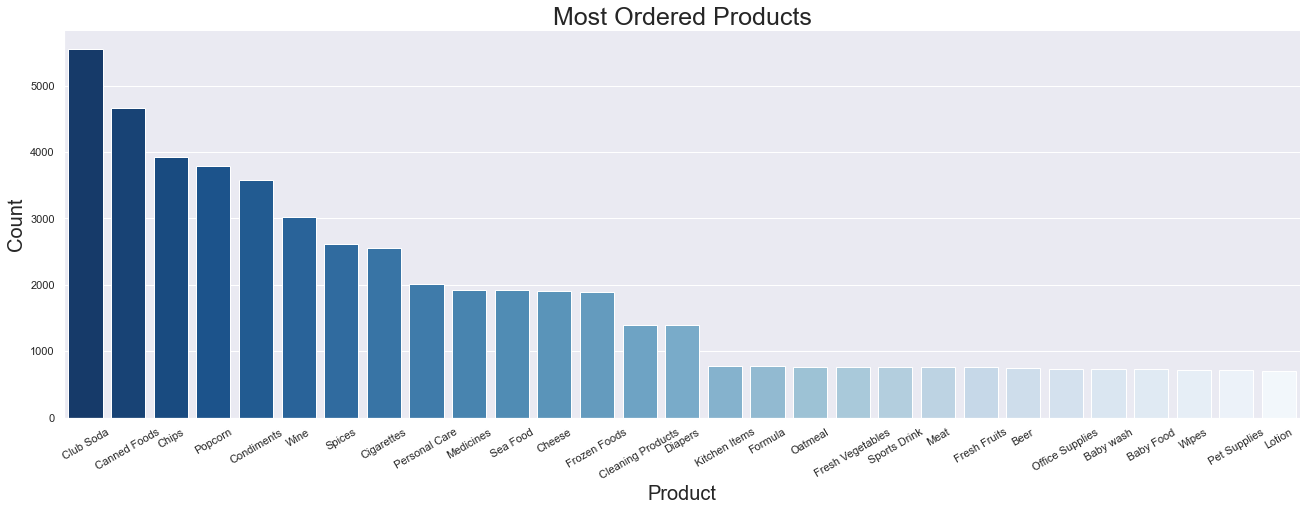

In [7]:
order_plot = df1.groupby(by='Product')['Product'].count().sort_values(ascending = False).index.values

sns.catplot(data = df1, x = 'Product', kind = 'count', height = 6, aspect = 3, order = order_plot, palette='Blues_r')
plt.title('Most Ordered Products', fontdict={'fontsize':25})
plt.xlabel('Product',fontdict={'fontsize':20})
plt.ylabel('Count', fontdict={'fontsize':20})
plt.xticks(rotation=30);


# 2. Where are These Orders Coming From?

In [8]:
#Merging country coordinate table to get the coordinates of each country
df1 = pd.merge(df1,country, left_on='COUNTRY_CODE', right_on='country', how = 'left')
df1.drop(['country','name'],axis = 1, inplace = True)

#Group by country to get the count of each country
loc_count = df1.groupby(["COUNTRY_CODE","latitude","longitude"])['COUNTRY_CODE'].count().reset_index(name='count')

In [9]:
#Plotting Location data of countries
m = folium.Map(location=[20,0], tiles = "OpenStreetMap", zoom_start = 2.35)

#Add marker one by one on the map
for i in range(0,len(loc_count)):
   folium.Circle(
      location=[loc_count.iloc[i]['latitude'], loc_count.iloc[i]['longitude']],
      popup=loc_count.iloc[i]['COUNTRY_CODE'],
      radius=float(loc_count.iloc[i]['count'])*50,
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(m)

# Show the map again
m

## The US seems to be our largest market. Lets take a deeper dive into the US and further narrow down the location.

In [10]:
world_cities = pd.merge(world_cities,state_abb, left_on='admin_name', right_on='State', how = 'left')

In [11]:
#Filtering data frame for US cities
us = df1[df1['COUNTRY_CODE'] == 'US']

#Getting lat and long of cities in US
us = pd.merge(us,world_cities[['city_ascii','Abbreviation','lat','lng']], left_on=['CITY','STATE'], right_on=['city_ascii','Abbreviation'], how = 'left')

In [12]:
#Getting count of number of orders in different cities
us = us.groupby(['CITY','lat','lng'])['STATE'].count().reset_index(name='count')

In [13]:
#Initializing Map
m = folium.Map(location=[37,-95], tiles = "OpenStreetMap", zoom_start = 4)

#Add marker one by one on the map
for i in range(0,len(us)):
   folium.Circle(
      location=[us.iloc[i]['lat'], us.iloc[i]['lng']],
      popup=us.iloc[i]['CITY'],
      radius=float(us.iloc[i]['count']*20),
      color='blue',
      fill=True,
      fill_color='blue'
   ).add_to(m)

# Show the map again
m

## Here we see that Los Angeles comes out on top more than any other city by a large margin

## Within L.A which products are ordered the most - Top 5

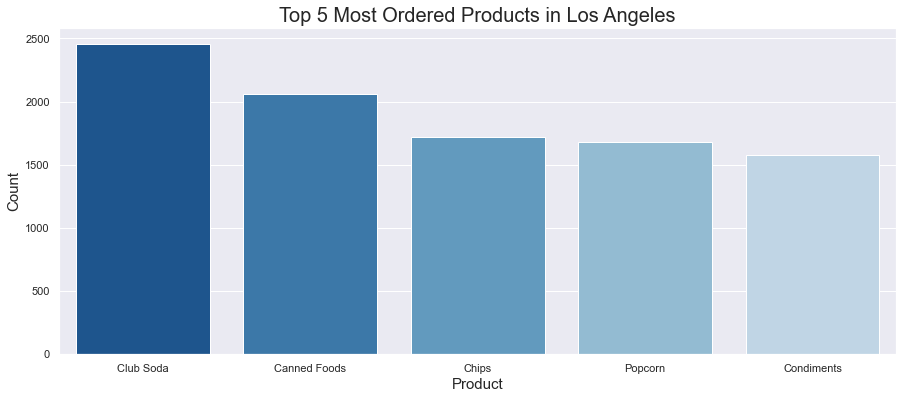

In [14]:
la_top_prod = df1[df1['CITY'] == 'Los Angeles'].groupby(by = 'Product')['Product'].count().nlargest(5).reset_index(name='count')

plt.figure(figsize=(15,6))
sns.barplot(data = la_top_prod, x = 'Product', y = 'count')
plt.title('Top 5 Most Ordered Products in Los Angeles', fontdict={'fontsize':20})
plt.xlabel('Product', fontdict={'fontsize':15})
plt.ylabel('Count',fontdict={'fontsize':15})
plt.show()

# 3. What do the sale of these products look like over time?

In [15]:
#Getting data of all cities that are in Los Angeles
la = df1[df1['CITY'] == 'Los Angeles'];

#Removing the time values from the date column
la['ORDER_DATE'] = la['ORDER_DATE'].str[:8];

#Parsing Date and time columns
la['ORDER_DATE'] = pd.to_datetime(la['ORDER_DATE'], format = '%d-%m-%y');
la['ORDER_TIME'] = pd.to_datetime(la['ORDER_TIME'], format = '%d-%m-%y %H:%M');

#Getting Month and Year column
la['Year'] = la['ORDER_DATE'].dt.year;
la['Month'] = la['ORDER_DATE'].dt.month;
la['Month Name'] = la['ORDER_DATE'].dt.strftime('%b');

#Getting count of the top 5 products during each month
la = la[la['Product'].isin(la_top_prod['Product'].unique())];
la = la.groupby(['Product','Year','Month','Month Name'])['Product'].count().reset_index(name='count').sort_values('Month');

<ipython-input-15-ae2c5d47c216>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la['ORDER_DATE'] = la['ORDER_DATE'].str[:8];
<ipython-input-15-ae2c5d47c216>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la['ORDER_DATE'] = pd.to_datetime(la['ORDER_DATE'], format = '%d-%m-%y');
<ipython-input-15-ae2c5d47c216>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Text(0, 0.5, 'Number of Times Ordered')

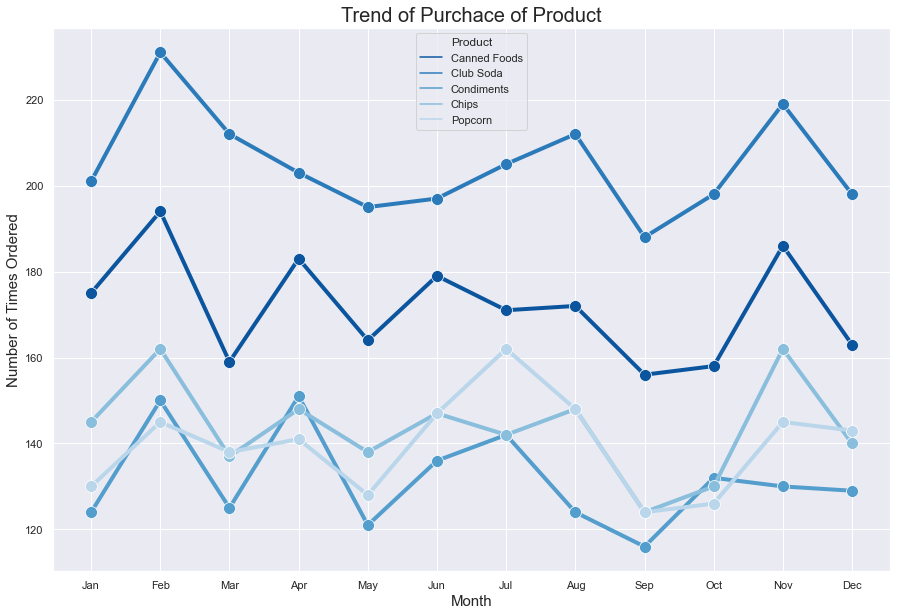

In [16]:
plt.figure(figsize=(15,10))
sns.lineplot(data = la, x='Month Name', y = 'count', hue='Product', marker = 'o', markersize=12, linewidth=4)
plt.title('Trend of Purchace of Product', fontdict={'fontsize':20})
plt.xlabel('Month', fontdict={'fontsize':15})
plt.ylabel('Number of Times Ordered', fontdict={'fontsize':15})

## This figure can give stores a good representation of what products to stock up on before the demand comes in

# 4. Which genders tend to order which type of products

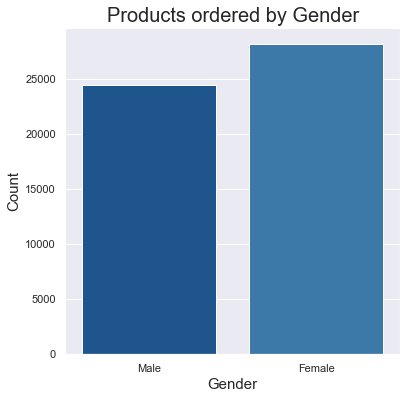

In [17]:
f,m = df1['GenderCode'].value_counts()

plt.figure(figsize=(6,6))
sns.barplot(x = ['Male','Female'], y = [m,f])
plt.title("Products ordered by Gender",fontdict={'fontsize':20})
plt.xlabel("Gender", fontdict={'fontsize':15})
plt.ylabel("Count", fontdict={'fontsize':15});

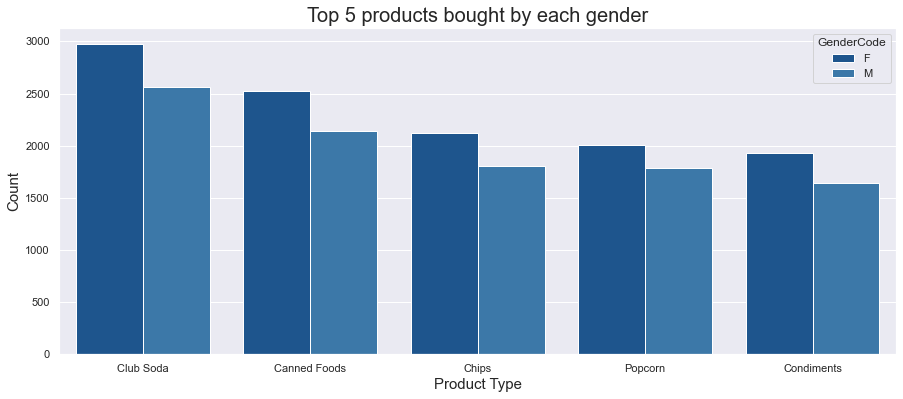

In [18]:
#Grouping by GenderCode and Product then getting a count. Then getting a count of each Product ordered by Gender and getting the top 5 ordered products of each category.
count = df1.groupby(['GenderCode','Product'])['Product'].count()
count = count.groupby(level=0,group_keys=False).nlargest(5).reset_index(name='count')

#Basic Barplotting
plt.figure(figsize=(15,6))
sns.barplot(data = count, x = 'Product',y = 'count',hue = 'GenderCode')
plt.title("Top 5 products bought by each gender", fontdict={'fontsize':20})
plt.xlabel("Product Type", fontdict={'fontsize':15})
plt.ylabel("Count", fontdict={'fontsize':15});

## From the second figure we can see that women tend to order products online more than men 
## The top 5 categories for each are plotted in the second figure and women have consistently ordered more than men in each category

# Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics, tree
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier